##### IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re #It is for regular expression
from wordcloud import WordCloud
!pip install anvil-uplink


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45228 sha256=6185b4b6378321be6eedfbaccc9386cdbb76099a81e7a842e4b2cb2bbf14ca44
  Stored in directory: /root/.cache/pip/wheels/2e/7c/ad/d9c746276bf024d44296340869fcb169f1e5d80fb147351a57
Successfully built ws4py


In [ ]:
# Tokenizer to tokenize the text data 
from tensorflow.keras.preprocessing.text import Tokenizer

# Pad sequences to pad those data set which are not long enough
# It is text data , some data could be 100-200 words .
# Suppose we are taking 700 words as constant width then we need to pad to make it 700 words
#  Because the deeplearning model takes constant lenght input
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Importing our sequential model in which we will bw feeding the layers of our models
from tensorflow.keras.models import Sequential

#These are the keras layers dense , embedding, lstm , convulation1D,MaxPool1D
from tensorflow.keras.layers import Dense, Embedding,LSTM,Conv1D,MaxPool1D

# To split train and test data set
from sklearn.model_selection import train_test_split

# Used to test model performance
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
#https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

##### IMPORTING  FAKE DATA SET






In [ ]:
fake=pd.read_csv('https://raw.githubusercontent.com/UtkarshMidha/Fake-News-kaggle-dataset/master/Fake.csv')

In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
for i in fake.columns:
  print(fake[i].value_counts(),end="\n-------------\n")

MEDIA IGNORES Time That Bill Clinton FIRED His FBI Director On Day Before Vince Foster Was Found Dead                                                                  6
ELEMENTARY SCHOOL PLANS ‘BLACKS ONLY’ FIELD TRIP TO COLLEGE FOR THIRD GRADERS                                                                                          4
FORMER FBI ASST DIRECTOR: “Jim Comey ‘Danced With The Devil’…I’m Glad He’s Gone” [VIDEO]                                                                               4
AN INSIDE LOOK AT OBAMA’S 5-STAR SUMMER VACATION RETREAT: Meanwhile…62% Of Americans Won’t Be Taking A Vacation This Summer                                            3
GARY JOHNSON: Meet The “Creepy” Pro-Amnesty, Anti-Gun, Pro-TPP, Pro-Abortion, Democrat Party Operative And His Anti-Gun Rights, Friend Of Clinton’s VP Pick [VIDEO]    3
                                                                                                                                                           

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64


<Axes: xlabel='subject', ylabel='count'>

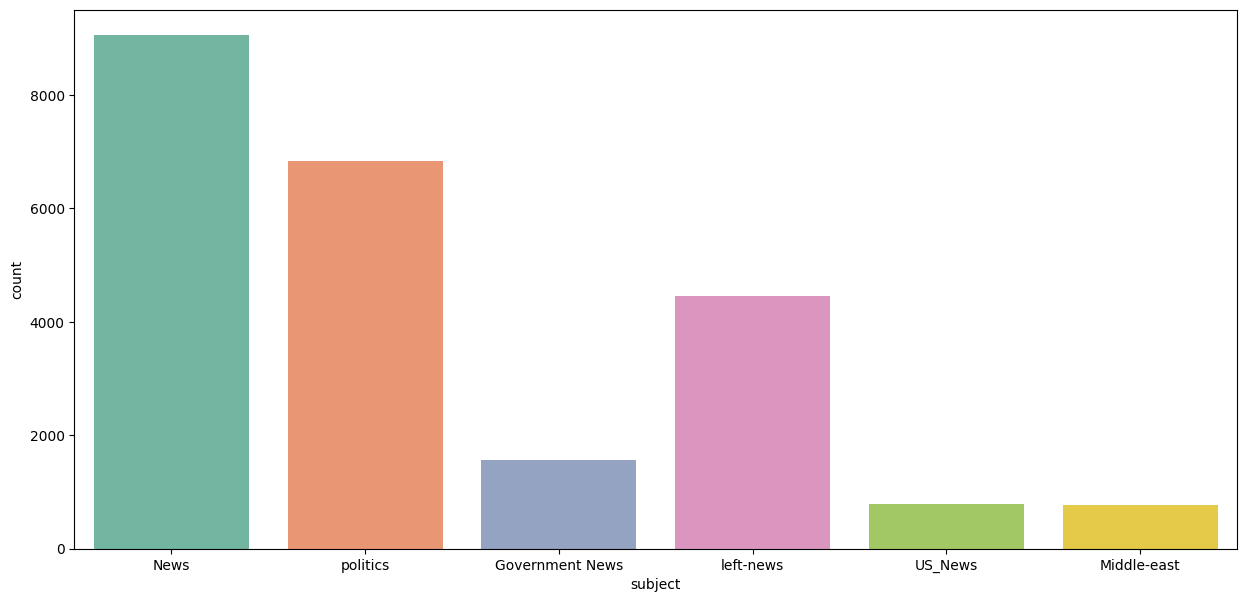

In [ ]:
print(fake['subject'].value_counts())
# sns.set_theme(style="whitegrid")
# sns.axes_style("darkgrid")
plt.figure(figsize=(15,7))
sns.dark_palette("xkcd:golden", 8)
sns.countplot(x='subject',data=fake, palette="Set2")


##### WORDCLOUD OF FAKE NEWS



In [ ]:
# For wordcloud you need to mix all fake text data together
fake['text'].tolist()[:3]

['Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t e

In [ ]:
# We need single text data i.e. join complete text data
text=' '.join(fake['text'].tolist())

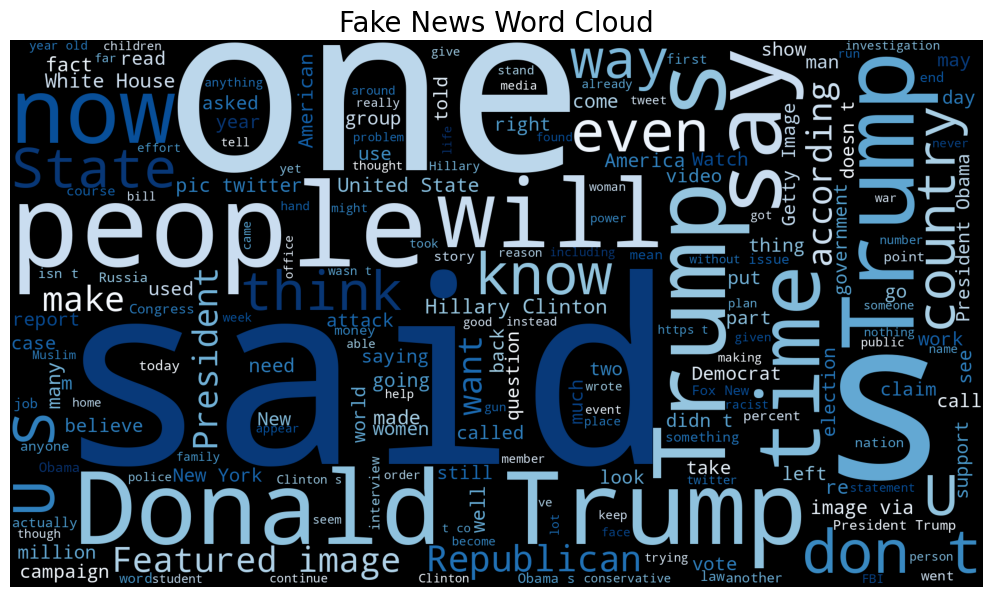

In [ ]:
wordcloud=WordCloud(background_color='black',width=1920, height=1080,colormap='Blues').generate(text)
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=1)
plt.title("Fake News Word Cloud", fontsize=20)
plt.show()

##### IMPORTING REAL DATA SET






In [ ]:
real=pd.read_csv('https://raw.githubusercontent.com/UtkarshMidha/Fake-News-kaggle-dataset/master/True.csv')

In [ ]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
real['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

##### WORDCLOUD OF REAL NEWS

In [ ]:
# We need single text data i.e. join complete text data
text=' '.join(real['text'].tolist())

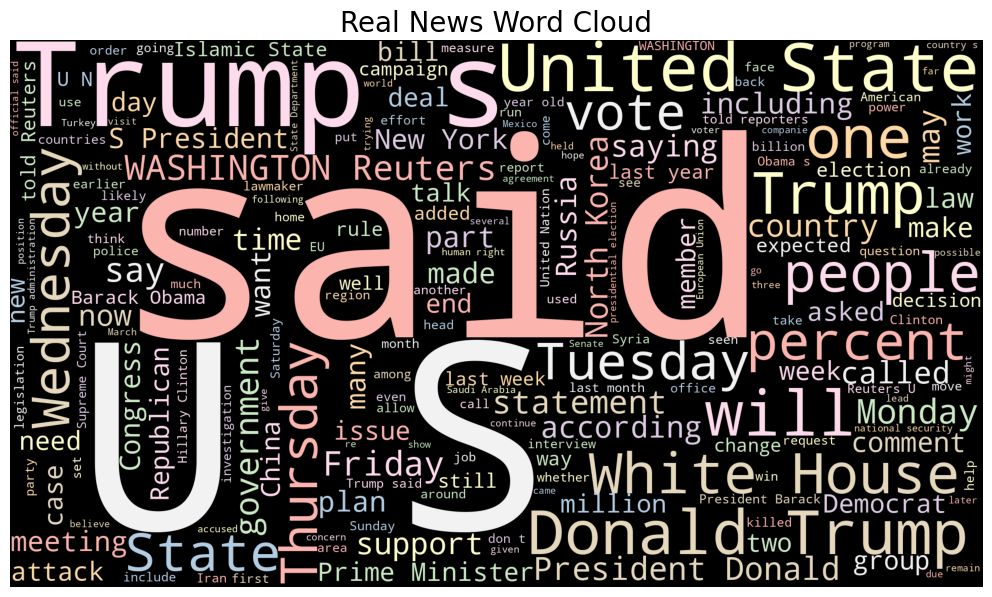

In [ ]:
wordcloud=WordCloud(background_color='black',width=1920, height=1080,colormap='Pastel1').generate(text)
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=1)
plt.title("Real News Word Cloud", fontsize=20)
plt.show()

##### Cleaning the Data


In [ ]:
real.sample(5)

,title,text,subject,date
12827,German SPD backs talks with Merkel after impas...,BERLIN (Reuters) - Germany s Social Democrats ...,worldnews,"December 6, 2017"
300,No. 2 Democrat in Senate calls on Franken to r...,"(Reuters) - U.S. Senator Dick Durbin, the No. ...",politicsNews,"December 6, 2017"
5689,"Trump tweets 'Iran is playing with fire', says...",WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"February 3, 2017"
453,Factbox: Trump on Twitter (Nov 30) - NYTimes,The following statements were posted to the ve...,politicsNews,"November 30, 2017"
12679,Mexico right-left coalition presents bid to ru...,MEXICO CITY (Reuters) - Mexico s newest politi...,worldnews,"December 9, 2017"


In [ ]:
unknown_publishers = []
for index,row in enumerate(real.text.values):
  try:
    # To check if  hyphen (we are breaking text on hyphen)
    record=row.split('-',maxsplit=1)
    record[1] #We try to run it , if empty then it will move to exception
    # Let's know if short news are from twitter
    assert(len(record[0])<120)
  except:
    # Deal with the above 3 cases
    unknown_publishers.append(index)

In [ ]:
print(len(unknown_publishers))

222


In [ ]:
real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [ ]:
# Drop 8970 row as it has no data
real.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [ ]:
real.drop(8970,axis=0) #axis=0 means drop from row

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
# Create a new column to add publisher info and handle cases where there is no publisher
publisher=[]
tmp_text=[]

for idx,row in enumerate(real.text.values):
  if idx in unknown_publishers:
    tmp_text.append(row)
    publisher.append('Unknown')
  else:
    record=row.split('-',maxsplit=1)
    publisher.append(record[0].strip()) # First index has publisher 
    tmp_text.append(record[1].strip()) # strip is used to remove extra spaces


In [ ]:
real['publisher']=publisher
real['text']=tmp_text

In [ ]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [ ]:
real.shape

(21417, 5)

In [ ]:
# Check if fake news also has empty text data
empty_fake_index=[index for index, text in enumerate( fake.text.tolist()) if str(text).strip()==""]

In [ ]:
# The iloc() function in python is defined in the Pandas module that helps us to select a specific row or column from the data set
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [ ]:
# We need to remove them 
# As text is in the title so we merge text and title
real['text']=real['title']+ " " + real['text']
fake['text']=fake['title']+ " " + fake['text']

In [ ]:
real['text']=real['text'].apply(lambda x:str(x).lower())
fake['text']=fake['text'].apply(lambda x:str(x).lower())

##### Preprocessing of Data

In [ ]:
# There is no label for supervised learning in the real text data and fake text data
# So we add class
real['class']=1
fake['class']=0

In [ ]:
real.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [ ]:
# We need only text and class
real=real[['text','class']]

In [ ]:
fake=fake[['text','class']]

In [ ]:
# Append these two together
data=real.append(fake,ignore_index=True)

<ipython-input-35-69fa09fb3994>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=real.append(fake,ignore_index=True)


In [ ]:
data.sample(5)

,text,class
28469,"ellen absolutely destroys mississippi, their ...",0
25972,trump is crushing an int’l tradition that eve...,0
24004,"trump livid over kellyanne conway backlash, e...",0
10762,u.s. proposes hike in medicare advantage payme...,1
18276,your gilded chariot awaits: brunei sultan cele...,1


In [ ]:
# https://github.com/UtkarshMidha/Preprocessing_Python_Data

In [ ]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3

# !pip install git+https://github.com/UtkarshMidha/Preprocessing_Python_Data.git --upgrade --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 55.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
2023-05-13 07:49:14.486819: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# !pip uninstall preprocess_kgptalkie
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-z9i_eu_n
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-z9i_eu_n
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 9ca68d37027af9f6a30d54640347ce3b2e2694b3
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7620 sha256=bb0c88c13b764166f99720bf68189d56e3a2e558df871253edc37059dda39ba6
  Stored in directory: /tmp/pip-ephem-wheel-cache-k6mgmwu6/wheels/5c/94/34/99d5ff65e88b8d9a6c5e8d8652f2311d87790a61a1b7466e21
Successfully built preprocess-kgptalkie


In [ ]:
import preprocess_kgptalkie as ps

In [ ]:
data['text']=data['text'].apply(lambda x:ps.remove_special_chars(x))

In [ ]:
#The above line removes special character
# eg :
ps.remove_special_chars('this .,is !@#$%%^&awesome )')

'this is awesome'

##### Vectorization

In [ ]:
# To convert text to numerical data we use vectorization
# i.e. word 2 vector
# https://www.tensorflow.org/tutorials/text/word2vec

In [ ]:
import gensim

In [ ]:
y=data['class'].values

In [ ]:
data['text'].tolist()

['as us budget fight looms republicans flip their fiscal script the head of a conservative republican faction in the us congress who voted this month for a huge expansion of the national debt to pay for tax cuts called himself a fiscal conservative on sunday and urged budget restraint in 2018 in keeping with a sharp pivot under way among republicans us representative mark meadows speaking on cbs face the nation drew a hard line on federal spending which lawmakers are bracing to do battle over in january when they return from the holidays on wednesday lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues such as immigration policy even as the november congressional election campaigns approach in which republicans will seek to keep control of congress president donald trump and his republicans want a big budget increase in military spending while democrats also want proportional increases for nondefense discretionary spending on programs that

In [ ]:
X = [d.split() for d in data['text'].tolist()]

In [ ]:
type(X)

list

In [ ]:
type(X[0])

list

In [ ]:
# X is list of list

In [ ]:
print(X[0])

['as', 'us', 'budget', 'fight', 'looms', 'republicans', 'flip', 'their', 'fiscal', 'script', 'the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'us', 'congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues',

In [ ]:
# Taking dimension to be 100
DIM=100
w2v_model=gensim.models.Word2Vec(sentences=X,vector_size=DIM,window=10 , min_count=1)

In [ ]:
len(w2v_model.wv.index_to_key)

231911

In [ ]:
w2v_model.wv['india']

array([-2.222541  ,  1.0622944 , -1.3859113 ,  2.3857605 ,  1.3643734 ,
        0.12289878,  0.7014287 ,  1.6848226 ,  0.09551562,  1.7017387 ,
       -1.1349071 ,  2.534354  , -1.9298714 , -1.1255347 ,  1.4040723 ,
        2.6282108 ,  0.40978262,  2.5459182 ,  0.6906633 , -2.6049206 ,
        1.9443079 ,  2.22568   ,  0.6889669 , -1.1833516 ,  1.1295227 ,
        1.2229398 ,  0.19198957,  1.6694826 , -1.4970161 ,  0.9460776 ,
        2.0748334 ,  1.5038397 ,  0.21164174, -0.16206732, -0.87096554,
        3.6198127 , -0.72457737, -0.8786185 ,  1.7100508 , -0.38298735,
       -0.16722445, -3.7506669 ,  1.4503188 ,  1.6381503 , -2.75234   ,
       -1.0350754 , -0.00935064,  0.69738007,  0.01479419,  0.72940284,
       -0.75353473,  0.582755  ,  0.0144893 ,  0.13990904, -0.5508313 ,
       -0.5624835 ,  0.9567081 ,  2.23271   , -0.04162352, -1.1501254 ,
       -0.35628715,  0.18300815, -2.4296505 ,  0.11992162,  0.84271634,
        1.0901023 , -1.0467038 , -1.2589191 ,  2.9229248 , -0.15

In [ ]:
#For most similar to current word
w2v_model.wv.most_similar('usa')

[('mcculloughthis', 0.5631201863288879),
 ('todayhavana', 0.501954972743988),
 ('stalinism', 0.49440911412239075),
 ('todaypresident', 0.4861917197704315),
 ('mizuho', 0.48052820563316345),
 ('pictwittercomzkutv76jll', 0.47215837240219116),
 ('16b', 0.4715753495693207),
 ('pictwittercomzivpp8atvb', 0.46397992968559265),
 ('raton', 0.46115943789482117),
 ('promo', 0.45600080490112305)]

In [ ]:
# We can feed these vectors in machine learning model
# Then ML Model receates these vectors
# then there might be better accuracy

#We are going to create tokenizer
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X)


In [ ]:
# After tokenization the vector is converted into set of sequence 
X= tokenizer.texts_to_sequences(X)

In [ ]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 'for': 9,
 's': 10,
 'is': 11,
 'he': 12,
 'said': 13,
 'trump': 14,
 'it': 15,
 'with': 16,
 'was': 17,
 'as': 18,
 'his': 19,
 'by': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'not': 24,
 'from': 25,
 'this': 26,
 'at': 27,
 'are': 28,
 'who': 29,
 'us': 30,
 'an': 31,
 'they': 32,
 'i': 33,
 'but': 34,
 'we': 35,
 'would': 36,
 'president': 37,
 'about': 38,
 'will': 39,
 'their': 40,
 'had': 41,
 'you': 42,
 't': 43,
 'been': 44,
 'were': 45,
 'people': 46,
 'more': 47,
 'or': 48,
 'after': 49,
 'which': 50,
 'she': 51,
 'her': 52,
 'one': 53,
 'if': 54,
 'its': 55,
 'out': 56,
 'all': 57,
 'what': 58,
 'state': 59,
 'when': 60,
 'new': 61,
 'also': 62,
 'up': 63,
 'there': 64,
 'over': 65,
 'no': 66,
 'house': 67,
 'donald': 68,
 'our': 69,
 'states': 70,
 'clinton': 71,
 'obama': 72,
 'government': 73,
 'can': 74,
 'just': 75,
 'him': 76,
 'so': 77,
 'than': 78,
 'republican': 79,
 'other': 80,
 'so

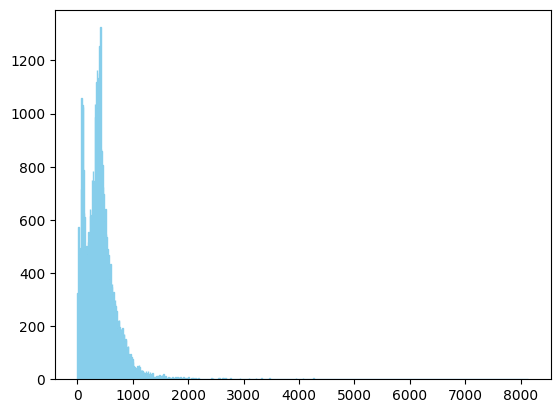

In [ ]:
# Now we will analyze the data in X
plt.hist([len(x) for x in X],bins =700, ec="skyblue") #A histogram displays numerical data by grouping data into "bins" of equal width.
plt.show()

In [ ]:
# Lets see how many numbers are there 
# So we create a numpy array
nos=np.array([len(x) for x in X])
len(nos[nos>1000])

1584

In [ ]:
maxlen=1000
X = pad_sequences(X,maxlen=maxlen)
# We have got every sequence greater than 1000

In [ ]:
len(X[101])

1000

In [ ]:
# index starts from index 1 so we do +1 so that we can have room for unknown word
vocab_size = len(tokenizer.word_index)+1
vocab=tokenizer.word_index

In [ ]:
# We take the initial vector as an input to the machine learning model
def get_weight_matrix(model):
  weight_matrix=np.zeros((vocab_size,DIM))

  for word,i in vocab.items():
    weight_matrix[i] = model.wv[word]

  return weight_matrix

In [ ]:
embedding_vectors = get_weight_matrix(w2v_model)

In [ ]:
embedding_vectors.shape

(231912, 100)

##### Create ML MODEL

In [ ]:
model = Sequential()
# trainable= false means no retraining of vectors
model.add(Embedding(vocab_size, output_dim=DIM , weights = [embedding_vectors] , input_length=maxlen , trainable=False))
model.add(LSTM(units=128))
# Activation function used is sigmoid as there are two classes 0 and 1 only
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['acc'])

In [ ]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         23191200  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 23,308,577
Trainable params: 117,377
Non-trainable params: 23,191,200
_________________________________________________________________


In [ ]:
# Now Split train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [ ]:
# Keras can separate a portion of your training data into a validation dataset and evaluate the performance of your model on that validation dataset in each epoch. 
history = model.fit(X_train,y_train ,  validation_split=0.3, epochs=6)

Epoch 1/6
737/737 [==============================] - 34s 37ms/step - loss: 0.1541 - acc: 0.9434 - val_loss: 0.0949 - val_acc: 0.9672
Epoch 2/6
737/737 [==============================] - 27s 36ms/step - loss: 0.0807 - acc: 0.9729 - val_loss: 0.0642 - val_acc: 0.9805
Epoch 3/6
737/737 [==============================] - 27s 36ms/step - loss: 0.0492 - acc: 0.9835 - val_loss: 0.0401 - val_acc: 0.9877
Epoch 4/6
737/737 [==============================] - 26s 36ms/step - loss: 0.0243 - acc: 0.9924 - val_loss: 0.0259 - val_acc: 0.9923
Epoch 5/6
737/737 [==============================] - 27s 37ms/step - loss: 0.0139 - acc: 0.9954 - val_loss: 0.0299 - val_acc: 0.9906
Epoch 6/6
737/737 [==============================] - 27s 37ms/step - loss: 0.0060 - acc: 0.9986 - val_loss: 0.0206 - val_acc: 0.9939


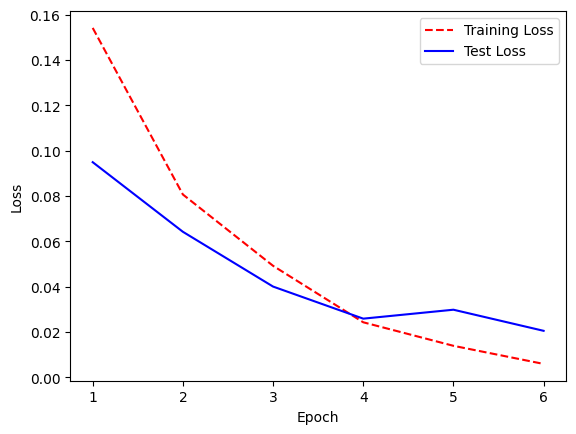

In [ ]:
# TRAINING VS VALIDATION LOSS
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

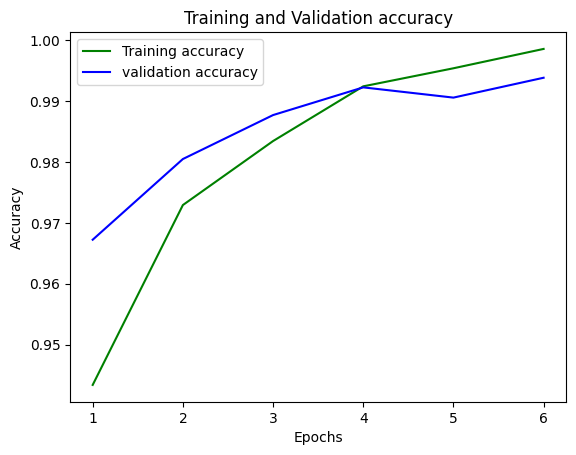

In [ ]:
# training accuracy vs. validation accuracy
loss_train = history.history['acc']
loss_val = history.history['val_acc']
epochs = range(1,7)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##### Checking accuracy on Test Data set

In [ ]:
y_pred = (model.predict(X_test)>=0.5).astype(int)

351/351 [==============================] - 5s 13ms/step


In [ ]:
A=accuracy_score(y_test,y_pred)
print("Accuracy : "+str(A*100)+"%")

Accuracy : 99.55456570155901%


In [ ]:
accuracy_score(y_test,y_pred)

0.9955456570155902

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5777
           1       1.00      1.00      1.00      5448

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



##### Testing on text data after training

In [ ]:
X_test

array([[    0,     0,     0, ...,    87,  1605,  7227],
       [    0,     0,     0, ...,   106,    22,  2075],
       [    0,     0,     0, ...,  1466,     4, 44442],
       ...,
       [    0,     0,     0, ...,     1,   179,    13],
       [    0,     0,     0, ...,   144,  2514,  2756],
       [    0,     0,     0, ...,   696,    47, 20146]], dtype=int32)

In [ ]:
x= ['this is a news']
len(tokenizer.texts_to_matrix(x)[0]) # Length is huge

231912

In [ ]:

x=tokenizer.texts_to_sequences(x)

In [ ]:
x=pad_sequences(x,maxlen=maxlen)

In [ ]:
# (model.predict(x)>=0.5).astype(int)
if((model.predict(x)>=0.5).astype(int)[0][0]==1):
  print("Real News :)")
else:
  print("Fake News :(")

1/1 [==============================] - 0s 30ms/step
Fake News :(


In [ ]:
#Now x is similar to X_test
model.predict(x)

1/1 [==============================] - 0s 28ms/step


array([[0.00354427]], dtype=float32)

In [ ]:
# 0 means this is fake news 
# 1 means this is real news

In [ ]:
x=['''And when the former president announced Tuesday that he would make a comeback bid for the White House, response was similarly mixed, if not chilly. Only a handful of Republican members of Congress backed him, while others either said they hoped there would be more options in the primary or just scurried away from reporters’ questions on Capitol Hill. Attention turned to polls showing that DeSantis would best him in hypothetical primary competitions, and even his own daughter and former adviser Ivanka Trump released a non-committal statement separating herself from his campaign without even an explicit endorsement..''']
x=tokenizer.texts_to_sequences(x)
x=pad_sequences(x,maxlen=maxlen)

print(model.predict(x)[0][0])
if((model.predict(x)>=0.5).astype(int)[0][0]==1):
  print("Real News :)")
else:
  print("Fake News :(")

1/1 [==============================] - 0s 29ms/step
0.99998343
1/1 [==============================] - 0s 29ms/step
Real News :)


In [ ]:
x=["And when the former president announced Tuesday that he would make a comeback bid for the White House, response was simil"]
x=tokenizer.texts_to_sequences(x)
x=pad_sequences(x,maxlen=maxlen)

print(model.predict(x)[0][0])
if((model.predict(x)>=0.5).astype(int)[0][0]==1):
  print("Real News :)")
else:
  print("Fake News :(")

1/1 [==============================] - 0s 29ms/step
0.9806968
1/1 [==============================] - 0s 28ms/step
Real News :)


In [ ]:
# Source of above news :
# https://www.usnews.com/news/the-report/articles/2022-11-18/trumps-not-done-with-america-and-america-just-might-not-be-done-with-him
# https://edition.cnn.com/2022/11/15/politics/trump-2024-presidential-bid/index.html
# https://www.cnbc.com/2022/11/22/trump-would-beat-desantis-in-2024-biden-approval-rate-underwater.html


In [ ]:
import locale

print(locale.getpreferredencoding())
locale.setlocale(locale.LC_ALL, 'en_US.utf8')
print(locale.getpreferredencoding())


ANSI_X3.4-1968
ANSI_X3.4-1968


In [ ]:
# import os
# os.environ['LC_ALL'] = 'en_US.UTF-8'
# os.environ['LANG'] = 'en_US.UTF-8'

# !apt-get install -y python3-pkg-resources
# !pip install anvil-uplink



# !pip install anvil-uplink



In [ ]:
import anvil.server

anvil.server.connect("XPWGEZKNQ3JZ36TAFYW327T2-J3YJGF5WT4NPQISQ")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


In [ ]:
@anvil.server.callable
def predict_news(data1):
  x=data1
  x=[x]
  # print(x)
  # print(type(x))

  # print("x : "+x)
  x=tokenizer.texts_to_sequences(x)
  x=pad_sequences(x,maxlen=maxlen)
  # print((model.predict(x)>=0.5).astype(int)[0][0])
  if((model.predict(x)>=0.5).astype(int)[0][0]==1):
    return("Real News :)")
  else:
    return ("Fake News :(")
  
  
  # x1=["And when the former president announced Tuesday that he would make a comeback bid for the White House, response was simil"]
  # # for a in x and b in x1:
  # #   if a != b:
  # #     print(a+" "+b)
  # # x=x1

  # str1=""
  # for ele in x1:
  #         str1 += ele
  # print("str :",end=" ")
  # print(data1==str1)

  # print(x==x1)
  # print(type(x1))
  # x=tokenizer.texts_to_sequences(x)
  # x=pad_sequences(x,maxlen=maxlen)

  # print(model.predict(x)[0][0])
  # if((model.predict(x)>=0.5).astype(int)[0][0]==1):
  #   print("Real News :)")
  # else:
  #   print("Fake News :(")
  # return (str(model.predict(x)[0][0]))



In [ ]:
  # a=(predict_news("And when the former president announced Tuesday that he would make a comeback bid for the White House, response was simil"))
  # print(a)

## What is Natural Language Processing (NLP)?  

Natural Language Processing (NLP) is basically how you can teach machines to understand human languages and extract meaning from text.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk as nlp
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
# Reading datasets
fake_df = pd.read_csv("https://raw.githubusercontent.com/UtkarshMidha/dataset/master/Fake.csv")
true_df = pd.read_csv("https://raw.githubusercontent.com/UtkarshMidha/dataset/master/True.csv")

In [ ]:
# Rows and columns of fake news dataset
print(f"Fake news dataset has: {fake_df.shape[0]} rows")
print(f"Fake news dataset has: {fake_df.shape[1]} columns")

Fake news dataset has: 23481 rows
Fake news dataset has: 4 columns


### Dealing with missing values if any

In [ ]:
fake_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
true_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

### Working on date column

In [ ]:
# Adding 'Fake' column to our datasets then join them together
fake_df['Fake'] = 1
true_df['Fake'] = 0
df = pd.concat([fake_df, true_df])

In [ ]:
# Extracting the year and the month 
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month

### EDA - Exploratory Data Analysis

<Axes: xlabel='Fake', ylabel='count'>

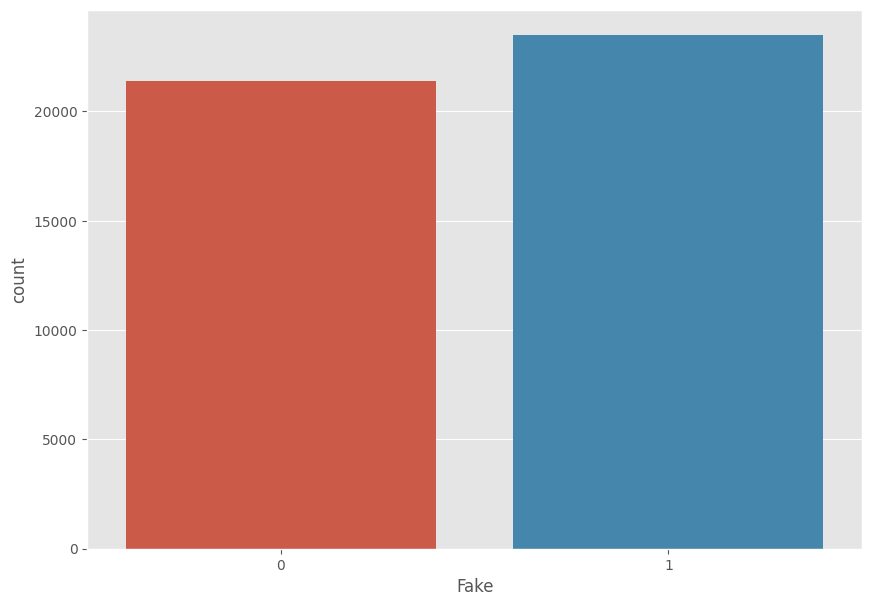

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='Fake')

<ipython-input-100-a13609bc1cb8>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


<Axes: xlabel='Year', ylabel='count'>

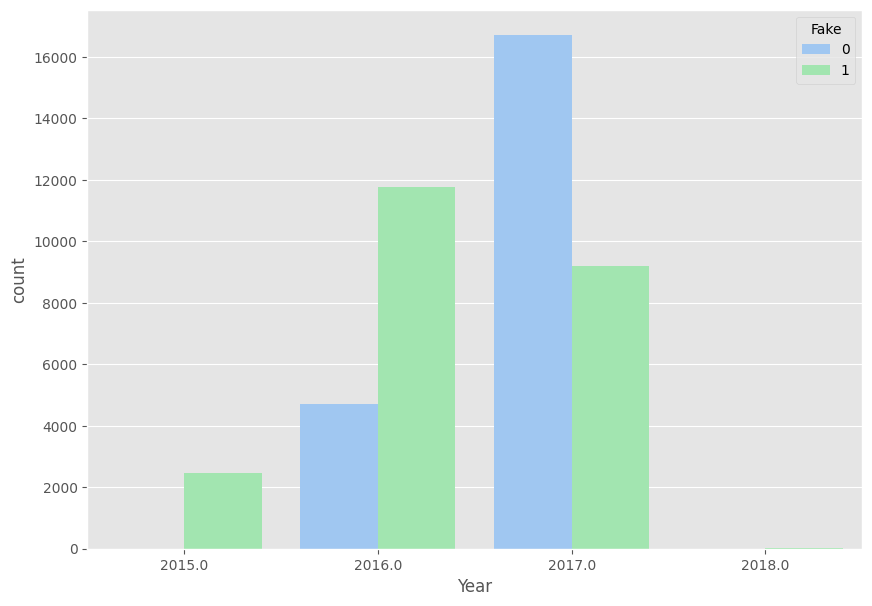

In [ ]:
# Correlation betwwen year and news
plt.style.use('seaborn-pastel')
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='Year', hue='Fake')

<Axes: xlabel='Month', ylabel='count'>

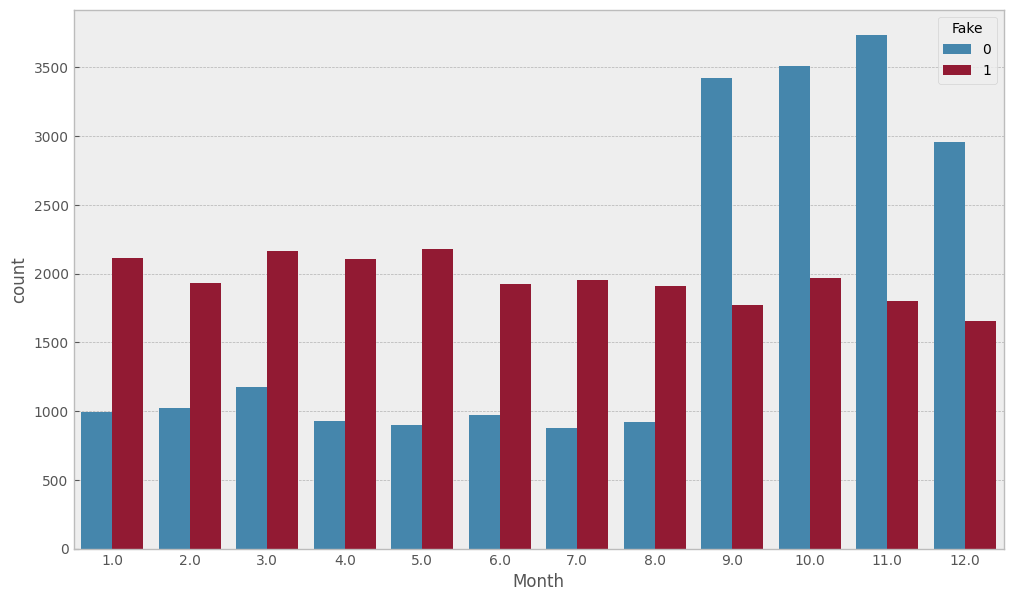

In [ ]:
# Correlation between months and news
plt.style.use('bmh')
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='Month', hue='Fake')

In [ ]:
# Subjects count
df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

<ipython-input-103-9690451b21a9>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


<Axes: xlabel='Year', ylabel='count'>

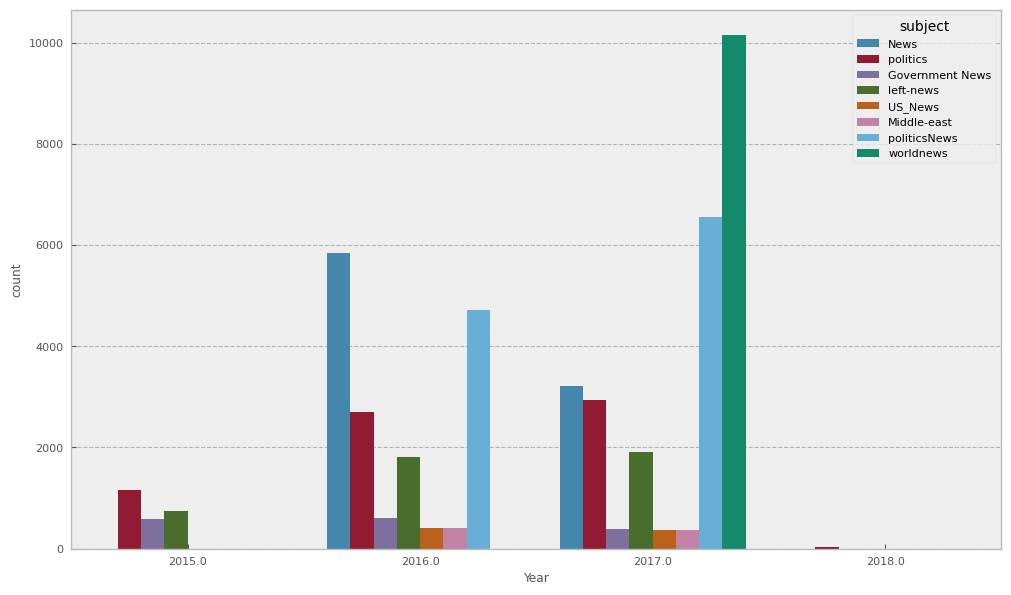

In [ ]:
plt.style.use('seaborn-paper')
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='Year', hue='subject')

# Preparing The Data

### Text preprocessing
Text is essentially strings and in order for a machine to work with, it needs to be transformed to numbers which the machine can understand. Also, there are words that you want to clean up from a text such as commonly occuring stopwords such as a, the, has, would and so on.

In the field of Natural Language Processing i.e., NLP, **Lemmatization** and **Stemming** are Text Normalization techniques. These techniques are used to prepare words, text, and documents for further processing.

#### Stemming

It is the process of reducing infected words to their stem, e.g. 'worked' becomes 'work'.

#### Lemmatization

The purpose of lemmatization is same as that of stemming but overcomes the drawbacks of stemming. In stemming, for some words, it may not give may not give meaningful representation.
Here, lemmatization comes into picture as it gives meaningful word. Lemmatization takes more time than stemming.

#### Tokenization

Tokenization breaks the text into small chunks for easing the computation.

#### Stopwords

Stopwords are the words in any language which does not add much meaning to a sentence.


In [ ]:
nlp.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# Joining the title and the content columns
df['full_text'] = df['title'] + ' ' + df['subject']

In [ ]:
df.head()

,title,text,subject,date,Fake,Year,Month,full_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,1,2017.0,12.0,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,1,2017.0,12.0,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,1,2017.0,12.0,Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,1,2017.0,12.0,Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,1,2017.0,12.0,Pope Francis Just Called Out Donald Trump Dur...


In [ ]:
# Target variable and features
y = df['Fake']
X = df.drop('Fake', axis=1)

## Stemming

In [ ]:
# Stemming process
def stemming_process(y):
    first_step = re.sub(r"^[A-Za-z]", ' ', y).lower()
    second_step = first_step.split()
    porter_stemmer = PorterStemmer()
    result = []
    for w in second_step:
        if w not in stopwords.words('english'):
            result.append(porter_stemmer.stem(w))
    return ' '.join(result)

In [ ]:
df['full_text'] = df['full_text'].apply(stemming_process)

In [ ]:
# Converting X and y to numpy arrays
X = df['full_text'].to_numpy()
y = df['Fake'].to_numpy()

In [ ]:
# Converting the text into numerical values
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [ ]:
# Building the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Fitting the model - Logistic Regression
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predictiion
prediction = lg.predict(X_test)

In [ ]:
# Score
accuracy = accuracy_score(prediction, y_test)
print(f"Model precision: {accuracy}")

Model precision: 0.9998218262806237


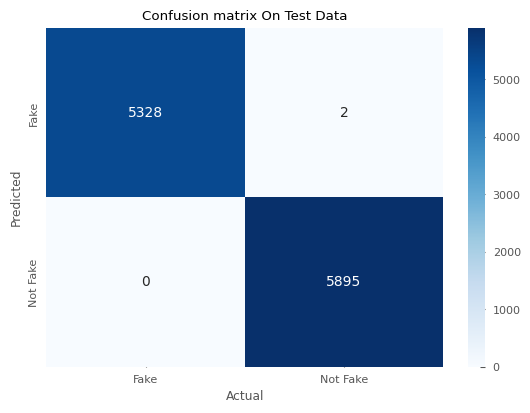

In [ ]:
# from sklearn.metrics import plot_confusion_matrix
# cm = metrics.confusion_matrix(y_test, prediction)
# plot_confusion_matrix(cm)
# # plot_confusion_matrix(X = test_generator.classes, y_true = y_pred,labels= category_names, normalize=False)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# new_cm = pd.DataFrame(cm, index=labels, columns=labels)
cm = confusion_matrix(y_test, prediction)
new_cm = pd.DataFrame(cm , index = ['Fake','Not Fake'] , columns = ['Fake','Not Fake'])
sns.heatmap(new_cm,cmap= 'Blues', annot = True, fmt='',xticklabels = ['Fake','Not Fake'], yticklabels = ['Fake','Not Fake'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

In [ ]:
anvil.server.wait_forever()

1/1 [==============================] - 0s 27ms/step
